# COVID-19 Verilerini Python ile Haritalama

Kullanacağımız araçlar

Anaconda https://www.anaconda.com/distribution/#windows
Spyder
Jupyter Notebook
Github
geopandas
numpy

Spyder bir bilimsel entegre geliştirme ortamıdır.

Binder

Jupyter Notebook 

Numpy: NumPy, Python programlama dili için bir kütüphane olup, büyük, çok boyutlu diziler ve matrisler için destek eklerken, bu dizilerde çalışmak için yüksek düzeyli matematiksel işlevlerin geniş bir koleksiyonudur

Pandas: Özellikle, sayısal tabloları ve zaman serilerini değiştirmek için veri yapıları ve işlemler sunar

Matplotlib, Python programlama dili ve sayısal matematik uzantısı NumPy için bir çizim kütüphanesidir.

Some videos to watch
https://www.youtube.com/watch?v=wsSEKm-rU6U
https://www.youtube.com/watch?v=cxLht5KN3pQ


## Geopandas
 
packages used in geopandas
Adding geospatial abilities to python
panda - data analysis library, python excel

shapely - geometric shapes library (based on geos)
fiona - reading writing geo (based on ogr)

pyproj - projections (based on proj4)

descartes- mapping visualizations 
matplotlib - visualisation library
geopy - geocoding
rtree - spatial analysis, simple, inside polygon neighboorhod something like that
pysal - spatial analysis functions, advanced, coloring maps
numpy - math library


## Kutuphaneleri Yükleme

In [25]:
#ürettiğimiz figürlerin notebook içinde kalması için
%matplotlib inline

import pandas as pd
import geopandas as gpd
import requests

In [26]:
veri_adresi = 'https://www.worldometers.info/coronavirus/'
r = requests.get(veri_adresi)
veri = pd.read_html(r.text)
veri = veri[0]

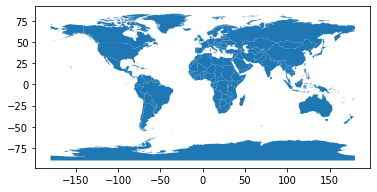

In [28]:
veriler_vaka = veri[['Country,Other', 'TotalCases', 'TotalDeaths']]
# https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1?geometry=-80.859%2C-89.944%2C75.234%2C48.630
dunyashape = gpd.read_file(r'girdi/dunyashape.shp')

dunyashape.plot()

In [29]:
dunyashape_list = dunyashape['CNTRY_NAME'].tolist()
veriler_list = veriler_vaka['Country,Other'].tolist()

dunyashape_list.sort()
veriler_list.sort()

for ulkeler in veriler_list:
    if ulkeler in dunyashape_list:
        pass
    else:
        print(ulkeler + ' shape dosyasinda yok')
    
dunyashape.replace('Bahamas, The', 'Bahamas', inplace = True)
dunyashape.replace('Byelarus', 'Belarus', inplace = True)
dunyashape.replace('South Korea', 'S. Korea', inplace = True)
dunyashape.replace('United States', 'USA', inplace = True)
dunyashape.replace('United Kingdom', 'UK', inplace = True)
dunyashape.replace('United Arab Emirates', 'UAE', inplace = True)
dunyashape.replace('Macau', 'Macao', inplace = True)
dunyashape.replace('Macedonia', 'North Macedonia', inplace = True)
dunyashape.replace('Czech Republic', 'Czechia', inplace = True)
dunyashape.replace('Myanmar (Burma)', 'Myanmar', inplace = True)

Bahamas shape dosyasinda yok
Belarus shape dosyasinda yok
CAR shape dosyasinda yok
Cabo Verde shape dosyasinda yok
Caribbean Netherlands shape dosyasinda yok
Channel Islands shape dosyasinda yok
Curaçao shape dosyasinda yok
Czechia shape dosyasinda yok
DRC shape dosyasinda yok
Diamond Princess shape dosyasinda yok
Eswatini shape dosyasinda yok
Faeroe Islands shape dosyasinda yok
Falkland Islands shape dosyasinda yok
Gambia shape dosyasinda yok
Hong Kong shape dosyasinda yok
Isle of Man shape dosyasinda yok
MS Zaandam shape dosyasinda yok
Macao shape dosyasinda yok
Myanmar shape dosyasinda yok
North Macedonia shape dosyasinda yok
Palestine shape dosyasinda yok
Réunion shape dosyasinda yok
S. Korea shape dosyasinda yok
Saint Kitts and Nevis shape dosyasinda yok
Saint Lucia shape dosyasinda yok
Saint Martin shape dosyasinda yok
Saint Pierre Miquelon shape dosyasinda yok
Sint Maarten shape dosyasinda yok
South Sudan shape dosyasinda yok
St. Barth shape dosyasinda yok
St. Vincent Grenadines

In [30]:
veriler_vaka.rename(columns = {'Country,Other': 'CNTRY_NAME'}, inplace = True)

veriler_birlestirilmis = dunyashape.merge(veriler_vaka, on = 'CNTRY_NAME')

veriler_birlestirilmis.to_file(r'cikti/covid-dunya.shp')

C:\Users\uzayuzal\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


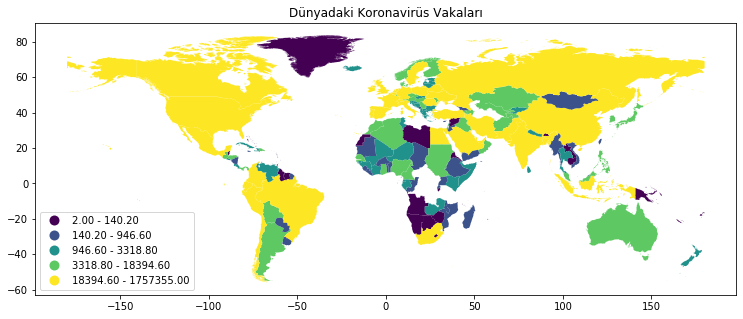

In [33]:
ax = veriler_birlestirilmis.plot(figsize=(15, 5), column='TotalCases', scheme='quantiles', legend=True, legend_kwds={'loc': 'lower left'})
ax.set_title("Dünyadaki Koronavirüs Vakaları")


import matplotlib.pyplot as plt
plt.savefig('cikti/covid-harita.png')


Text(0.5, 1, 'Coronavirus Cases Worldwide (Classified with Fisher Jenks 10 Class')

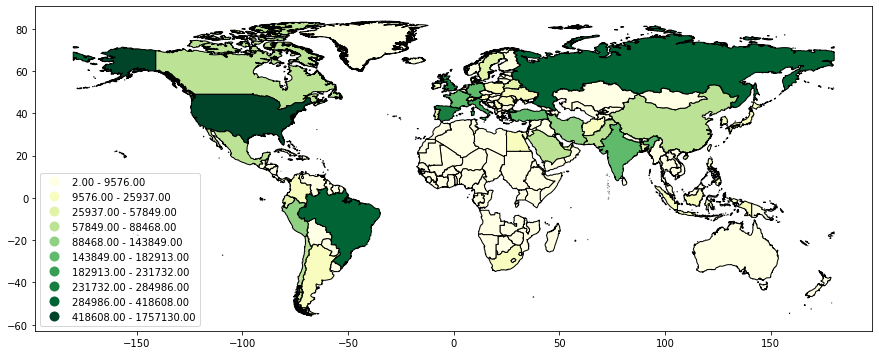

In [18]:
# gorsellestirme 2

ax2 = veriler_birlestirilmis.plot(figsize=(15, 15), column='TotalCases', scheme='fisher_jenks', k=10, legend=True, cmap='YlGn', edgecolor='black', legend_kwds={'loc': 'lower left'})
ax.set_title("Coronavirus Cases Worldwide (Classified with Fisher Jenks 10 Class")


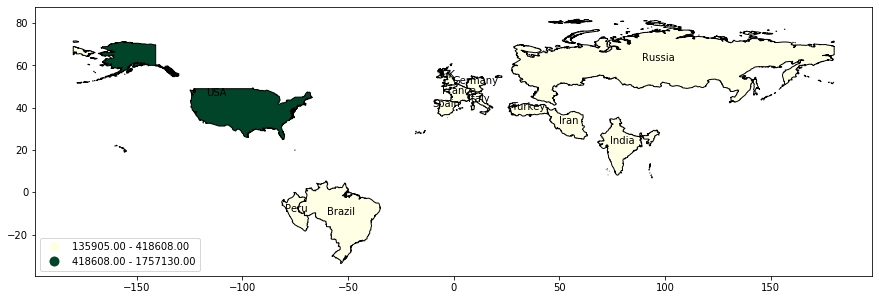

In [22]:
# vaka 100000'den fazla olanlar
vaka = veriler_birlestirilmis[veriler_birlestirilmis['TotalCases'] > 100000]
ax3 = vaka.plot(figsize=(15, 15), column='TotalCases', scheme='fisher_jenks', k=2, legend=True, cmap='YlGn', edgecolor='black', legend_kwds={'loc': 'lower left'})
vaka['CNTRY_NAME'].size
vaka.apply(lambda x: ax3.annotate(s=x['CNTRY_NAME'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

,OBJECTID,CNTRY_NAME,geometry,TotalCases,TotalDeaths
170,225,Turkey,"MULTIPOLYGON (((26.76389 40.65999, 26.69194 40...",160979,4461.0


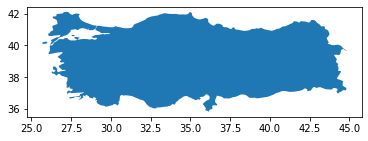

In [23]:
turkey = veriler_birlestirilmis[veriler_birlestirilmis['CNTRY_NAME'] == 'Turkey']
turkey.plot()

In [24]:
turkey

,OBJECTID,CNTRY_NAME,geometry,TotalCases,TotalDeaths
170,225,Turkey,"MULTIPOLYGON (((26.76389 40.65999, 26.69194 40...",160979,4461.0
